In [1]:
%matplotlib inline

# imports 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import flowkit as fk 
from openTSNE import TSNE

sample = fk.Sample('data/flow18_annotated.fcs', sample_id='flow18', channel_labels=('Parameter_1', 'Parameter_10', 'Parameter_11', 'Parameter_12', 'Parameter_13', 'Parameter_14', 'Parameter_15', 'Parameter_16', 'Parameter_17', 'Parameter_18', 'Parameter_19', 'Parameter_2', 'Parameter_20', 'Parameter_21', 'Parameter_22', 'Parameter_23', 'Parameter_24', 'Parameter_3', 'Parameter_4', 'Parameter_5', 'Parameter_6', 'Parameter_7', 'Parameter_8', 'Parameter_9', 'SampleID', 'class'))
df_events = sample.as_dataframe(source="raw")

# only use selected columns 
selected_columns = [
    'Parameter_10', 'Parameter_11', 'Parameter_12', 
    'Parameter_13', 'Parameter_15', 'Parameter_18', 'Parameter_20', 
    'Parameter_21', 'Parameter_23', 'Parameter_8', 'Parameter_9', 'class'
]

df_filtered = df_events[selected_columns]

fraction_used = 1.0 

# sample from dataset 
data_sample = df_filtered.sample(frac=fraction_used).reset_index(drop=True)

# get features and labels 
features = data_sample.drop(columns=['class'])  # All columns except 'class'
labels = data_sample['class']  # Only the 'class' column

In [2]:
# step 1: define affinities 
import openTSNE 
affinities12 = openTSNE.affinity.PerplexityBasedNN(
    features.to_numpy(),
    perplexity=50, 
    n_jobs=-1,
    random_state=12,
    verbose=True
    )

affinities42 = openTSNE.affinity.PerplexityBasedNN(
    features.to_numpy(),
    perplexity=50, 
    n_jobs=-1,
    random_state=42,
    verbose=True
    )

affinities3 = openTSNE.affinity.PerplexityBasedNN(
    features.to_numpy(),
    perplexity=50, 
    n_jobs=-1,
    random_state=3,
    verbose=True
    )

===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 822.20 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 204.85 seconds
===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 764.33 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 204.83 seconds
===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 774.08 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 296.11 seconds


In [3]:
init12 = openTSNE.initialization.random(n_samples=len(features) ,random_state=12, verbose=True)
init42 = openTSNE.initialization.random(n_samples=len(features) ,random_state=42, verbose=True)
init3 = openTSNE.initialization.random(n_samples=len(features) ,random_state=3, verbose=True)

In [4]:
# step 3: construct TSNEEmbedding object 
embedding12 = openTSNE.TSNEEmbedding(
    init12, 
    affinities12, 
    random_state=12,
    verbose=True
)

embedding42 = openTSNE.TSNEEmbedding(
    init42, 
    affinities42, 
    random_state=12,
    verbose=True
)

embedding3 = openTSNE.TSNEEmbedding(
    init3, 
    affinities3, 
    random_state=12,
    verbose=True
)

In [5]:
embedding12 = embedding12.optimize(
    n_iter=250, 
    learning_rate=200, 
    exaggeration=12, 
    momentum=0.5,  
    verbose=True
)

embedding42 = embedding42.optimize(
    n_iter=250, 
    learning_rate=200, 
    exaggeration=12, 
    momentum=0.5,  
    verbose=True
)

embedding3 = embedding3.optimize(
    n_iter=250, 
    learning_rate=200, 
    exaggeration=12, 
    momentum=0.5,  
    verbose=True
)

===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 9.7230, 50 iterations in 366.2158 sec
Iteration  100, KL divergence 9.7230, 50 iterations in 336.2752 sec
Iteration  150, KL divergence 9.7230, 50 iterations in 335.6567 sec
Iteration  200, KL divergence 9.7230, 50 iterations in 330.6048 sec
Iteration  250, KL divergence 9.7230, 50 iterations in 331.2183 sec
   --> Time elapsed: 1699.98 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 9.7230, 50 iterations in 355.9020 sec
Iteration  100, KL divergence 9.7230, 50 iterations in 333.4880 sec
Iteration  150, KL divergence 9.7230, 50 iterations in 349.4670 sec
Iteration  200, KL divergence 9.7230, 50 iterations in 331.1792 sec
Iteration  250, KL divergence 9.7230, 50 iterations in 337.3168 sec
   --> Time elapsed: 1707.36 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations.

In [6]:
embedding12_final = embedding12.optimize(
    n_iter=750, 
    learning_rate=200, 
    momentum=0.8, 
    verbose=True
)

embedding42_final = embedding42.optimize(
    n_iter=750, 
    learning_rate=200, 
    momentum=0.8, 
    verbose=True
)

embedding3_final = embedding3.optimize(
    n_iter=750, 
    learning_rate=200, 
    momentum=0.8, 
    verbose=True
)

===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 9.7230, 50 iterations in 362.1039 sec
Iteration  100, KL divergence 9.7230, 50 iterations in 341.0289 sec
Iteration  150, KL divergence 9.7229, 50 iterations in 332.9858 sec
Iteration  200, KL divergence 9.7044, 50 iterations in 387.5734 sec
Iteration  250, KL divergence 9.1031, 50 iterations in 419.0186 sec
Iteration  300, KL divergence 8.4717, 50 iterations in 276.0450 sec
Iteration  350, KL divergence 8.1237, 50 iterations in 276.4207 sec
Iteration  400, KL divergence 7.8850, 50 iterations in 275.3594 sec
Iteration  450, KL divergence 7.7024, 50 iterations in 275.4360 sec
Iteration  500, KL divergence 7.5536, 50 iterations in 275.8108 sec
Iteration  550, KL divergence 7.4272, 50 iterations in 276.5369 sec
Iteration  600, KL divergence 7.3168, 50 iterations in 275.4881 sec
Iteration  650, KL divergence 7.2185, 50 iterations in 276.2203 sec
Iteration  700, KL divergence 7.12

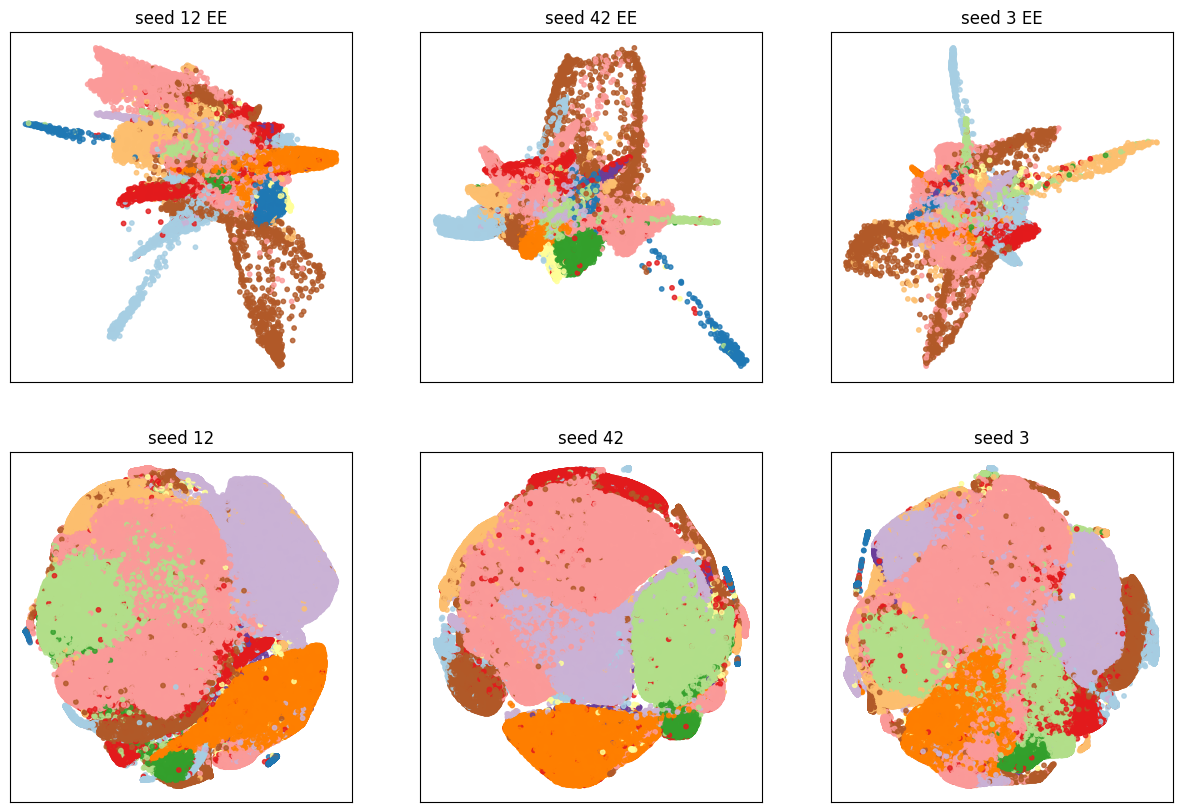

In [13]:
# List of embeddings
all_embeddings = [embedding12, embedding42, embedding3, embedding12_final, embedding42_final, embedding3_final]

# Create a 2x2 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Title for the entire figure
# fig.suptitle("Impact of different seed values on embedding", fontsize=16, y=0.92)

# Subtitles for each subplot
subtitles = ["seed 12 EE", "seed 42 EE", "seed 3 EE", "seed 12", "seed 42", "seed 3"]

# Plot each embedding in the corresponding subplot
for ax, embedding, subtitle in zip(axes.flat, all_embeddings, subtitles):
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1],
                          c=labels, cmap=plt.colormaps.get_cmap('Paired'), s=10, alpha=0.8)
    ax.set_xticks([])  # Hide x ticks
    ax.set_yticks([])  # Hide y ticks
    ax.set_title(subtitle, fontsize=12)  # Subtitle for each subplot

#plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include the main title
plt.show()

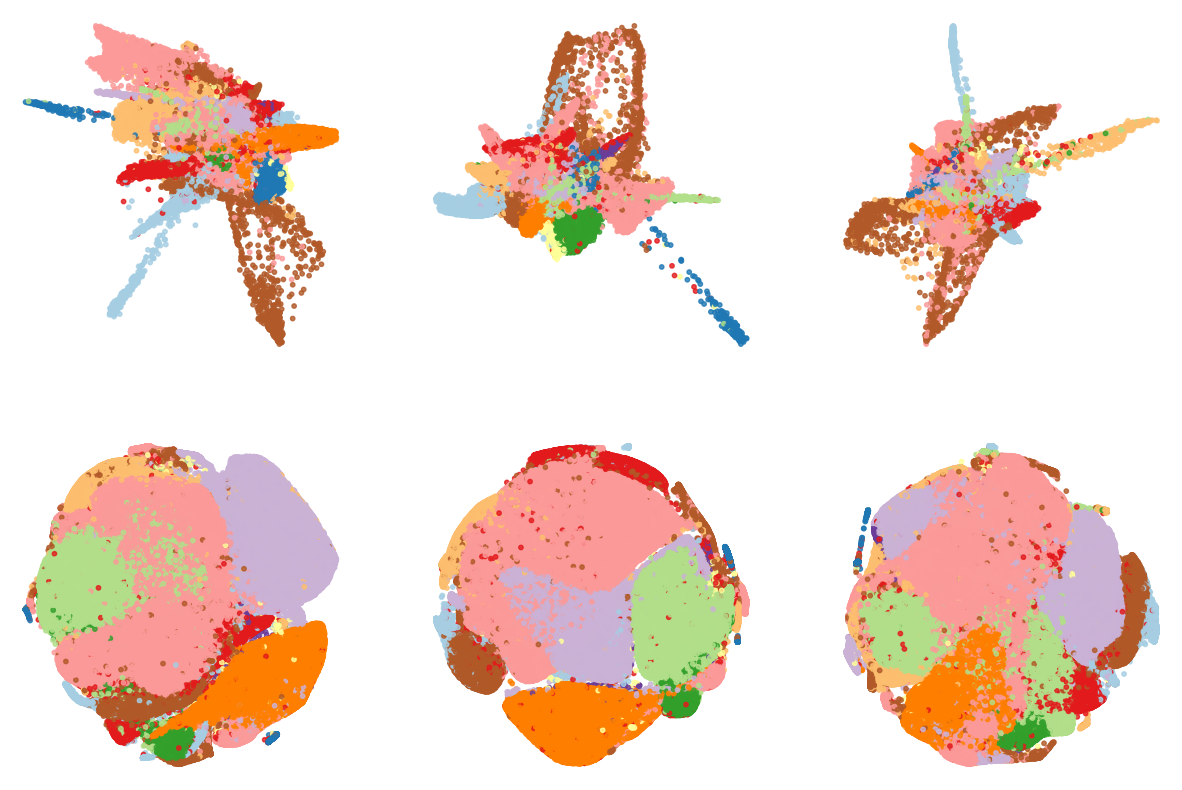

In [14]:
import matplotlib.pyplot as plt

# List of embeddings
all_embeddings = [embedding12, embedding42, embedding3, embedding12_final, embedding42_final, embedding3_final]

# Create a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot each embedding in the corresponding subplot
for ax, embedding in zip(axes.flat, all_embeddings):
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1],
                          c=labels, cmap=plt.colormaps.get_cmap('Paired'), s=10, alpha=0.8)
    ax.set_xticks([])  # Hide x ticks
    ax.set_yticks([])  # Hide y ticks
    ax.set_frame_on(False)  # Remove subplot borders

plt.show()
